In [1]:
import keras
import tensorflow as tf
import glob
from pathlib import Path
from astropy.io import fits
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.0.0


# DFNN

In [19]:
galaxy = np.zeros(1600)
for filepath in glob.iglob('../Data/cutouts/galaxyfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata.flatten()
    galaxy = np.vstack((galaxy,scidata.transpose()))
galaxy = galaxy[1:,]
print(galaxy.shape)

(3123, 1600)


In [20]:
len(galaxy)

3123

In [21]:
ones = np.ones((len(galaxy),1))
galaxy = np.hstack((galaxy,ones))
print(galaxy)

[[ 9.40328622e+00  5.01508598e+01  6.26885748e+00 ... -1.56721437e+01
   5.32852886e+01  1.00000000e+00]
 [-4.20467634e+01 -2.40267220e+01  2.40267220e+01 ...  9.01002073e+00
   3.00334024e+00  1.00000000e+00]
 [ 3.55271368e-15 -1.03274136e+01  3.55271368e-15 ...  4.64733610e+01
  -6.71281881e+01  1.00000000e+00]
 ...
 [ 4.39908299e+01  9.74082663e+01  1.88532128e+01 ...  5.65596385e+01
   1.25688086e+01  1.00000000e+00]
 [ 3.05073237e+01  3.92237020e+01 -3.05073237e+01 ...  2.61491346e+01
  -5.66564584e+01  1.00000000e+00]
 [ 2.96328783e+01  2.25209875e+02  6.72666337e+02 ... -2.07430148e+01
   2.07430148e+01  1.00000000e+00]]


In [22]:
star = np.zeros(1600)
count = 0
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata.flatten()
    star = np.vstack((star,scidata.transpose()))
    count += 1
    if count == len(galaxy):
        break
star = star[1:,]
print(star.shape)

(3123, 1600)


In [23]:
zeros = np.zeros((len(star),1))
star = np.hstack((star,zeros))
print(star)

[[ 3.09599509e+01  5.30742016e+01  2.65371008e+01 ...  3.09599509e+01
   1.32685504e+01  0.00000000e+00]
 [ 1.57110107e+01 -2.51376171e+01 -9.42660642e+00 ... -4.08486278e+01
  -2.51376171e+01  0.00000000e+00]
 [-2.10233817e+01 -2.70300622e+01 -4.20467634e+01 ...  6.00668049e+00
  -2.10233817e+01  0.00000000e+00]
 ...
 [ 1.72459230e+01 -8.62296152e+00 -4.31148076e+01 ... -2.87432051e+00
  -2.29945641e+01  0.00000000e+00]
 [-1.50704026e+01 -6.02816105e+01 -2.71267247e+01 ...  1.50704026e+01
  -4.21971273e+01  0.00000000e+00]
 [ 5.00044450e-12  2.66064448e+01 -3.25189881e+01 ...  3.84315314e+01
   5.61691613e+01  0.00000000e+00]]


In [24]:
df = pd.DataFrame(np.vstack((galaxy,star)))

In [25]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
count,6246.000000,6.246000e+03,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,...,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6.246000e+03,6246.00000
mean,9.279946,7.384533e+00,7.649702,8.976779,11.363929,9.714112,8.904392,9.301632,12.552384,14.368985,...,11.191178,12.224433,13.309742,14.152078,12.618974,11.335560,9.228611,9.468317,8.344487e+00,0.50000
std,179.549601,1.300475e+02,123.206876,127.329250,184.413534,155.416322,104.924421,125.384920,244.187106,338.188735,...,155.618143,194.306010,282.146356,342.194416,309.777841,232.209308,180.581193,166.867395,1.483459e+02,0.50004
min,-139.462051,-1.216386e+02,-132.017389,-149.747497,-139.420083,-139.420083,-151.127679,-245.088973,-148.164392,-2385.300271,...,-116.784614,-129.092669,-156.815577,-137.094981,-147.643304,-141.907776,-135.624283,-142.172573,-1.612530e+02,0.00000
25%,-18.084483,-2.010992e+01,-18.806572,-18.600566,-17.883933,-18.609557,-17.717275,-18.806572,-18.595454,-17.883933,...,-18.020041,-17.542778,-18.084483,-17.883933,-18.600566,-18.612554,-20.145518,-19.838014,-2.015394e+01,0.00000
50%,2.952879,5.000445e-12,2.853424,2.947284,3.003340,2.947284,2.954575,2.947284,3.100094,3.362440,...,3.014081,3.102092,3.014081,3.100094,2.956272,2.959780,2.834002,2.883801,5.000445e-12,0.50000
75%,24.112644,2.370630e+01,23.706303,24.026722,25.865567,24.742825,24.816738,24.812742,25.137617,26.556697,...,25.137617,25.855615,26.608935,25.912212,25.429553,25.290441,23.845243,24.812742,2.280766e+01,1.00000
max,11088.387918,6.104883e+03,5692.622200,5743.728709,8916.695399,7967.189507,4358.996398,6672.651478,15791.548860,18441.157375,...,7691.554366,11856.924424,20294.999150,24945.813652,21364.863323,13548.665567,10628.847856,11428.127184,9.456572e+03,1.00000


In [26]:
X = df.drop([1600],axis=1)
y = df[1600]
print(X,y)

              0          1             2          3          4          5     \
0     9.403286e+00  50.150860  6.268857e+00  34.478716  -6.268857   6.268857   
1    -4.204676e+01 -24.026722  2.402672e+01 -48.053444  -6.006680  -9.010021   
2     3.552714e-15 -10.327414  3.552714e-15 -77.455602  46.473361 -15.491120   
3    -2.171465e+01  37.225107  9.306277e+00 -49.633476  46.531384   3.102092   
4     2.217309e+01  -4.434618 -3.552714e-15  17.738472  -8.869236  35.476944   
...            ...        ...           ...        ...        ...        ...   
6241  3.852274e+01 -23.706303 -5.333918e+01  47.412605  35.559454  44.449317   
6242 -1.153520e+01  49.024609 -3.748941e+01 -17.302803  51.908409 -66.327412   
6243  1.724592e+01  -8.622962 -4.311481e+01 -28.743205 -22.994564 -34.491846   
6244 -1.507040e+01 -60.281610 -2.712672e+01  -6.028161   6.028161 -33.154886   
6245  5.000445e-12  26.606445 -3.251899e+01   5.912543 -29.562716 -41.387803   

            6           7           8  

In [27]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
transformer
transformer.transform(X)

array([[ 3.30013433e-03,  1.76007165e-02,  2.20008956e-03, ...,
         5.50022389e-03, -5.50022389e-03,  1.87007612e-02],
       [-1.68358546e-04, -9.62048833e-05,  9.62048833e-05, ...,
         1.20256104e-05,  3.60768313e-05,  1.20256104e-05],
       [ 1.38100886e-20, -4.01446638e-05,  1.38100886e-20, ...,
        -1.20433991e-04,  1.80650987e-04, -2.60940314e-04],
       ...,
       [ 4.73381363e-03, -2.36690681e-03, -1.18345341e-02, ...,
         5.52278257e-03, -7.88968938e-04, -6.31175151e-03],
       [-7.06364077e-03, -2.82545631e-02, -1.27145534e-02, ...,
         3.53182038e-02,  7.06364077e-03, -1.97781941e-02],
       [ 1.99415741e-15,  1.06105446e-02, -1.29684434e-02, ...,
         7.07369637e-03,  1.53263421e-02,  2.24000385e-02]])

In [28]:
X = pd.DataFrame(transformer.transform(X))
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
count,6246.000000,6.246000e+03,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,...,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6.246000e+03
mean,0.000567,3.930492e-04,0.000347,0.000374,0.000632,0.000354,0.000432,0.000388,0.000432,0.000484,...,0.000355,0.000397,0.000448,0.000479,0.000469,0.000497,0.000432,0.000362,0.000426,4.286227e-04
std,0.014228,1.125710e-02,0.010588,0.009576,0.009923,0.010349,0.010700,0.011588,0.011037,0.010514,...,0.009274,0.009114,0.009686,0.010934,0.011881,0.011871,0.011047,0.010586,0.011114,1.288265e-02
min,-0.041403,-4.741719e-02,-0.046747,-0.045472,-0.046206,-0.047062,-0.052037,-0.048940,-0.040098,-0.109372,...,-0.042587,-0.057766,-0.041736,-0.056570,-0.050205,-0.043905,-0.055027,-0.044898,-0.042211,-5.673679e-02
25%,-0.001403,-1.455110e-03,-0.001493,-0.001375,-0.001212,-0.001436,-0.001347,-0.001422,-0.001444,-0.001310,...,-0.001383,-0.001436,-0.001352,-0.001417,-0.001397,-0.001452,-0.001331,-0.001490,-0.001524,-1.562683e-03
50%,0.000023,1.387505e-15,0.000008,0.000018,0.000033,0.000018,0.000023,0.000020,0.000040,0.000043,...,0.000042,0.000039,0.000038,0.000035,0.000034,0.000023,0.000022,0.000005,0.000011,5.271254e-16
75%,0.001537,1.566691e-03,0.001462,0.001581,0.001779,0.001429,0.001498,0.001472,0.001533,0.001643,...,0.001630,0.001553,0.001523,0.001690,0.001633,0.001566,0.001560,0.001515,0.001606,1.440504e-03
max,0.520752,3.576398e-01,0.377884,0.199361,0.295349,0.362317,0.364298,0.393990,0.313139,0.317382,...,0.276188,0.215407,0.249568,0.427175,0.525067,0.482205,0.436249,0.416777,0.448118,4.251489e-01


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_dim=1600, ))
classifier.add(Dropout(0.5))
#Second  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Third  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='Adadelta',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=32, epochs=1, shuffle=True, use_multiprocessing=True)

Epoch 1/1
4996/4996 [==============================] - 5s 999us/step - loss: 0.6930 - accuracy: 0.5104


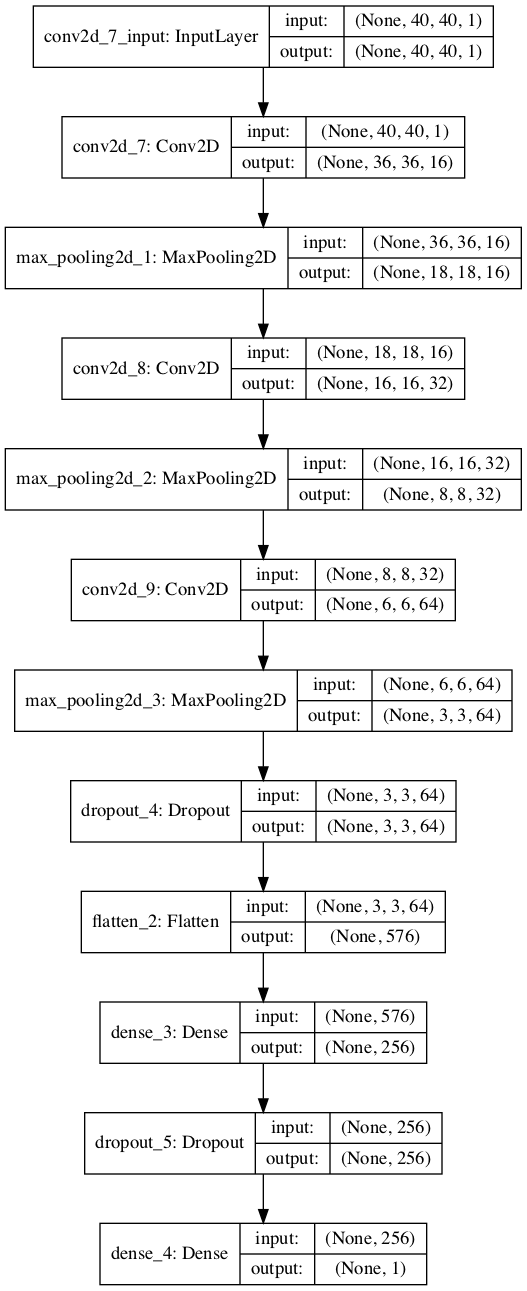

In [31]:
from keras.utils import plot_model
plot_model(model, to_file='../Figures/FNN_model_self.png',show_shapes=True, show_layer_names=True)

In [149]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               409856    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 520       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [150]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

4996/4996 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 42us/step


In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[522 132]
 [ 78 518]]


In [152]:
def MCC(matrix):
    '''
    Calcualtes the Matthews Correlation Coefficient from a confusion matrix
    '''
    return ((matrix[0,0]*matrix[1,1])-(matrix[1,0]*matrix[0,1]))/np.sqrt((cm[0,0]+cm[1,0])*(cm[0,0]+cm[0,1])*(cm[1,1]+cm[1,0])*(cm[1,1]+cm[0,1]))

In [153]:
print("Error Rate:"+'{:.3%}'.format((cm[0,1]+cm[1,0])/np.sum(cm)))
print("Accuracy:"+'{:.3%}'.format((cm[0,0]+cm[1,1])/np.sum(cm)))
print("Sensitivity:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[0,:])))
print("Specificity :"+'{:.3%}'.format((cm[1,1])/np.sum(cm[1,:])))
print("Precision:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[:,0])))
print("False Positive Rate:"+'{:.3%}'.format(1-((cm[1,1])/np.sum(cm[1,:]))))
print("Matthews Correlation Coefficient:"+'{:.3%}'.format(MCC(cm)))

Error Rate:16.800%
Accuracy:83.200%
Sensitivity:79.817%
Specificity :86.913%
Precision:87.000%
False Positive Rate:13.087%
Matthews Correlation Coefficient:66.711%


# CNN

In [3]:
galaxy = np.zeros((40,40))
for filepath in glob.iglob('../Data/cutouts/galaxyfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    galaxy = np.dstack((galaxy,scidata))
galaxy = galaxy[:,:,1:]
print(galaxy.shape[2])

3123


In [4]:
star = np.zeros((40,40))
count = 0
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata
    star = np.dstack((star,scidata))
    count += 1
    if count == galaxy.shape[2]:
        break
star = star[:,:,1:]
print(star.shape)

(40, 40, 3123)


In [5]:
X = np.dstack((galaxy,star))
y = np.dstack((np.ones((1,1,galaxy.shape[2])),np.zeros((1,1,galaxy.shape[2]))))
print(X.shape)

(40, 40, 6246)


In [6]:
X = np.moveaxis(X, -1, 0)
y = np.moveaxis(y, -1, 0)

In [7]:
print(y.shape)

(6246, 1, 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [10]:
X_train = X_train.reshape(len(X_train),40,40,1)
X_test = X_test.reshape(len(X_test),40,40,1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(40,40,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer ='Adadelta',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
model.fit(X_train,y_train, batch_size=32, epochs=1, shuffle=True, use_multiprocessing=True)

Epoch 1/1
4996/4996 [==============================] - 6s 1ms/step - loss: 59.5168 - accuracy: 0.6121


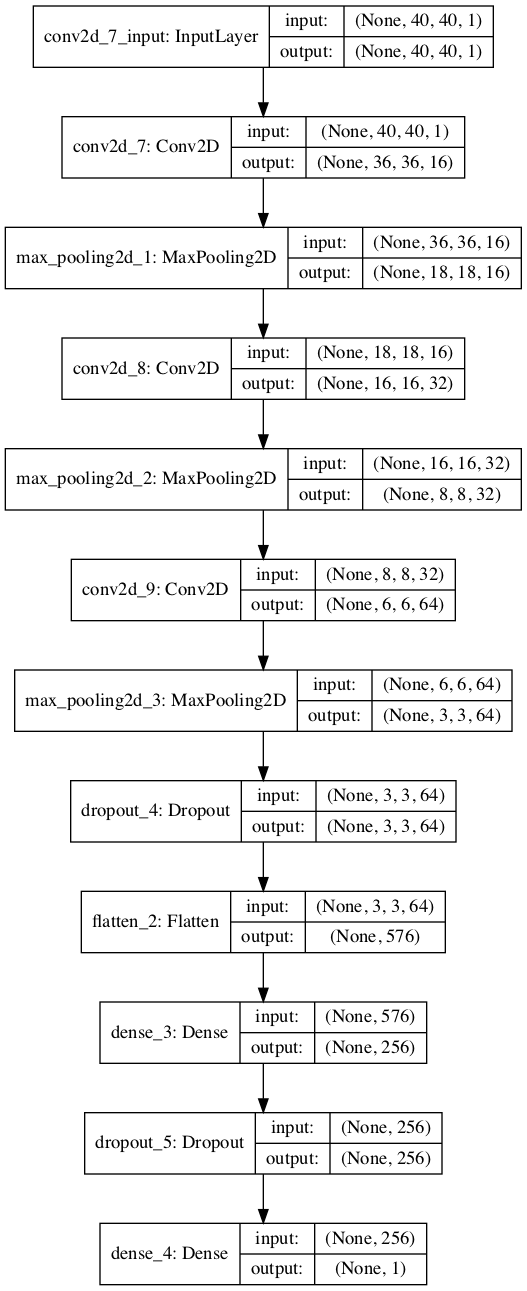

In [18]:
from keras.utils import plot_model
plot_model(model, to_file='../Figures/CNN_model_self.png',show_shapes=True, show_layer_names=True)

In [11]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(40,40,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=5, activation='relu',strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=5, activation='relu',strides=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer ='Adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
model.fit(X_train,y_train, batch_size=32, epochs=1, shuffle=True, use_multiprocessing=True)

Epoch 1/1
4996/4996 [==============================] - 19s 4ms/step - loss: 6.0392 - accuracy: 0.5867


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)         

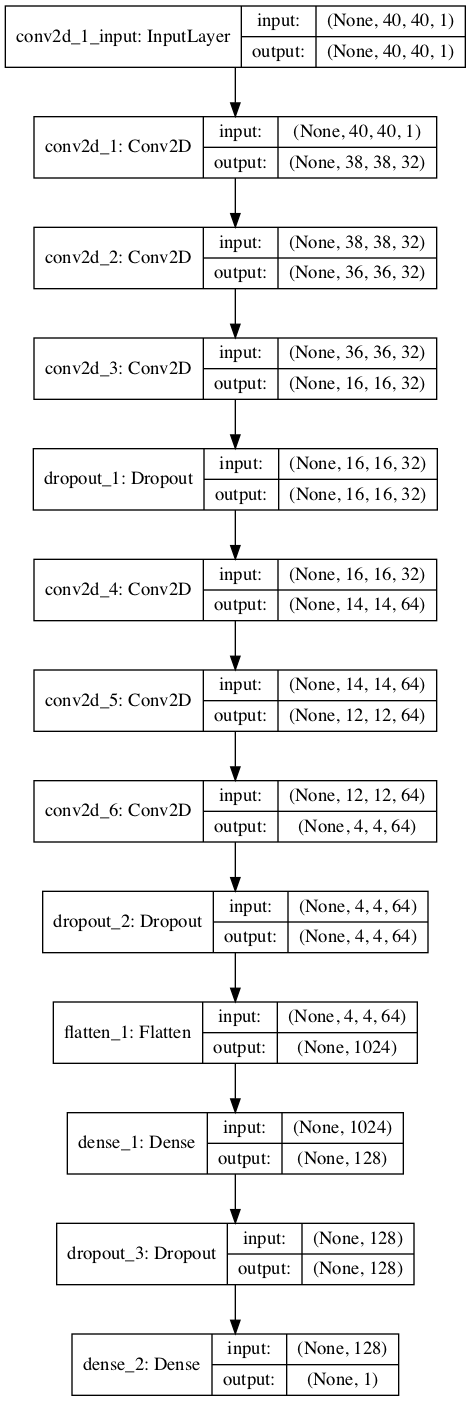

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='../Figures/CNN_model.png',show_shapes=True, show_layer_names=True)

In [34]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('../Figures/CNN_accuracy.png')
plt.show()

NameError: name 'history' is not defined

In [ ]:
eval_model=model.evaluate(X_train, y_train)
eval_model
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
print(cm[0,1])

In [ ]:
def MCC(matrix):
    '''
    Calcualtes the Matthews Correlation Coefficient from a confusion matrix
    '''
    return ((matrix[0,0]*matrix[1,1])-(matrix[1,0]*matrix[0,1]))/np.sqrt((cm[0,0]+cm[1,0])*(cm[0,0]+cm[0,1])*(cm[1,1]+cm[1,0])*(cm[1,1]+cm[0,1]))

In [ ]:
print("Error Rate:"+'{:.3%}'.format((cm[0,1]+cm[1,0])/np.sum(cm)))
print("Accuracy:"+'{:.3%}'.format((cm[0,0]+cm[1,1])/np.sum(cm)))
print("Sensitivity:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[0,:])))
print("Specificity :"+'{:.3%}'.format((cm[1,1])/np.sum(cm[1,:])))
print("Precision:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[:,0])))
print("False Positive Rate:"+'{:.3%}'.format(1-((cm[1,1])/np.sum(cm[1,:]))))
print("Matthews Correlation Coefficient:"+'{:.3%}'.format(MCC(cm)))

In [ ]:
model.save('../Models/CNN_model.h5')

## Sanity Check

In [ ]:
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    

In [179]:
filepath = '../Data/cutouts/starfits/starfits-256.fits'
fp = Path(filepath)
hdulist = fits.open(fp)
scidata = hdulist[0].data

In [181]:
# Stars should return 0, galaxies return 1
model.predict(scidata.reshape(1,40,40,1))

array([[0.36742818]], dtype=float32)

In [30]:
tf.__version__

'2.1.0'

In [1]:
print(X)

NameError: name 'X' is not defined

# Autokeras

In [163]:
import autokeras as ak

# Initialize the image classifier.
clf = ak.ImageClassifier()
# Feed the image classifier with training data.
clf.fit(X_train, y_train)

# Predict with the best model.
predicted_y = clf.predict(X_test)
print(predicted_y)

# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 53s - loss: 0.7693 - accuracy: 0.437 - ETA: 4s - loss: 0.5806 - accuracy: 0.645 - ETA: 2s - loss: 0.5931 - accuracy: 0.65 - ETA: 1s - loss: 0.5914 - accuracy: 0.65 - ETA: 0s - loss: 0.5795 - accuracy: 0.66 - ETA: 0s - loss: 0.5759 - accuracy: 0.66 - ETA: 0s - loss: 0.5747 - accuracy: 0.67 - ETA: 0s - loss: 0.5720 - accuracy: 0.67 - ETA: 0s - loss: 0.5700 - accuracy: 0.67 - ETA: 0s - loss: 0.5691 - accuracy: 0.68 - 1s 10ms/step - loss: 0.5686 - accuracy: 0.6800 - val_loss: 0.5803 - val_accuracy: 0.6997
Epoch 2/1000
125/125 [==============================] - ETA: 3s - loss: 0.4150 - accuracy: 0.71 - ETA: 0s - loss: 0.5196 - accuracy: 0.72 - ETA: 0s - loss: 0.5432 - accuracy: 0.69 - ETA: 0s - loss: 0.5454 - accuracy: 0.70 - ETA: 0s - loss: 0.5393 - accuracy: 0.71 - ETA: 0s - loss: 0.5360 - accuracy: 0.71 - ETA: 0s - loss: 0.5324 - accuracy: 0.71 - ETA: 0s - loss: 0.5332 - accuracy: 0.71

125/125 [==============================] - ETA: 3s - loss: 0.2455 - accuracy: 0.90 - ETA: 0s - loss: 0.1884 - accuracy: 0.94 - ETA: 0s - loss: 0.1898 - accuracy: 0.93 - ETA: 0s - loss: 0.2040 - accuracy: 0.93 - ETA: 0s - loss: 0.2054 - accuracy: 0.92 - ETA: 0s - loss: 0.2041 - accuracy: 0.92 - ETA: 0s - loss: 0.2081 - accuracy: 0.92 - ETA: 0s - loss: 0.2134 - accuracy: 0.92 - ETA: 0s - loss: 0.2102 - accuracy: 0.92 - ETA: 0s - loss: 0.2080 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2085 - accuracy: 0.9269 - val_loss: 0.2215 - val_accuracy: 0.9199
Epoch 32/1000
125/125 [==============================] - ETA: 3s - loss: 0.2199 - accuracy: 0.90 - ETA: 0s - loss: 0.1835 - accuracy: 0.93 - ETA: 0s - loss: 0.1804 - accuracy: 0.93 - ETA: 0s - loss: 0.1874 - accuracy: 0.93 - ETA: 0s - loss: 0.1939 - accuracy: 0.93 - ETA: 0s - loss: 0.2000 - accuracy: 0.92 - ETA: 0s - loss: 0.2018 - accuracy: 0.92 - ETA: 0s - loss: 0.2071 - accuracy: 0.92 - ETA: 0s - loss: 0.2048 - accuracy: 0.92 - ETA: 0s - loss

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 11:34 - loss: 0.6038 - accuracy: 0.687 - ETA: 3:50 - loss: 1.5287 - accuracy: 0.687 - ETA: 2:18 - loss: 1.2057 - accuracy: 0.63 - ETA: 1:38 - loss: 1.0812 - accuracy: 0.61 - ETA: 1:15 - loss: 0.9618 - accuracy: 0.60 - ETA: 1:01 - loss: 0.8859 - accuracy: 0.62 - ETA: 51s - loss: 0.8541 - accuracy: 0.6418 - ETA: 44s - loss: 0.8404 - accuracy: 0.633 - ETA: 39s - loss: 0.8151 - accuracy: 0.625 - ETA: 34s - loss: 0.8278 - accuracy: 0.615 - ETA: 31s - loss: 0.8242 - accuracy: 0.595 - ETA: 28s - loss: 0.8016 - accuracy: 0.604 - ETA: 25s - loss: 0.7851 - accuracy: 0.608 - ETA: 23s - loss: 0.7713 - accuracy: 0.608 - ETA: 21s - loss: 0.7601 - accuracy: 0.609 - ETA: 20s - loss: 0.7485 - accuracy: 0.610 - ETA: 18s - loss: 0.7430 - accuracy: 0.612 - ETA: 17s - loss: 0.7337 - accuracy: 0.615 - ETA: 16s - loss: 0.7271 - accuracy: 0.618 - ETA: 15s - loss: 0.7163 - accuracy: 0.624 - ETA: 14s - loss: 

Epoch 6/1000
125/125 [==============================] - ETA: 7s - loss: 0.2376 - accuracy: 0.93 - ETA: 4s - loss: 0.3133 - accuracy: 0.88 - ETA: 4s - loss: 0.2918 - accuracy: 0.88 - ETA: 4s - loss: 0.2956 - accuracy: 0.87 - ETA: 4s - loss: 0.2941 - accuracy: 0.87 - ETA: 4s - loss: 0.2887 - accuracy: 0.88 - ETA: 3s - loss: 0.2931 - accuracy: 0.88 - ETA: 3s - loss: 0.2959 - accuracy: 0.88 - ETA: 3s - loss: 0.3005 - accuracy: 0.87 - ETA: 3s - loss: 0.3042 - accuracy: 0.87 - ETA: 3s - loss: 0.3136 - accuracy: 0.87 - ETA: 3s - loss: 0.3100 - accuracy: 0.88 - ETA: 3s - loss: 0.2973 - accuracy: 0.88 - ETA: 3s - loss: 0.2931 - accuracy: 0.88 - ETA: 3s - loss: 0.2810 - accuracy: 0.89 - ETA: 3s - loss: 0.2784 - accuracy: 0.89 - ETA: 3s - loss: 0.2734 - accuracy: 0.89 - ETA: 3s - loss: 0.2791 - accuracy: 0.89 - ETA: 2s - loss: 0.2865 - accuracy: 0.89 - ETA: 2s - loss: 0.2808 - accuracy: 0.89 - ETA: 2s - loss: 0.2804 - accuracy: 0.89 - ETA: 2s - loss: 0.2762 - accuracy: 0.89 - ETA: 2s - loss: 0.27

Epoch 9/1000
125/125 [==============================] - ETA: 6s - loss: 0.2046 - accuracy: 0.93 - ETA: 4s - loss: 0.2807 - accuracy: 0.89 - ETA: 4s - loss: 0.2443 - accuracy: 0.91 - ETA: 4s - loss: 0.2617 - accuracy: 0.90 - ETA: 4s - loss: 0.2479 - accuracy: 0.90 - ETA: 3s - loss: 0.2369 - accuracy: 0.91 - ETA: 3s - loss: 0.2486 - accuracy: 0.90 - ETA: 3s - loss: 0.2497 - accuracy: 0.90 - ETA: 3s - loss: 0.2453 - accuracy: 0.90 - ETA: 3s - loss: 0.2520 - accuracy: 0.90 - ETA: 3s - loss: 0.2589 - accuracy: 0.90 - ETA: 3s - loss: 0.2543 - accuracy: 0.90 - ETA: 3s - loss: 0.2463 - accuracy: 0.91 - ETA: 3s - loss: 0.2437 - accuracy: 0.90 - ETA: 3s - loss: 0.2356 - accuracy: 0.91 - ETA: 3s - loss: 0.2371 - accuracy: 0.91 - ETA: 3s - loss: 0.2316 - accuracy: 0.91 - ETA: 3s - loss: 0.2358 - accuracy: 0.91 - ETA: 2s - loss: 0.2418 - accuracy: 0.90 - ETA: 2s - loss: 0.2377 - accuracy: 0.91 - ETA: 2s - loss: 0.2413 - accuracy: 0.90 - ETA: 2s - loss: 0.2390 - accuracy: 0.90 - ETA: 2s - loss: 0.24

Epoch 12/1000
125/125 [==============================] - ETA: 6s - loss: 0.2380 - accuracy: 0.90 - ETA: 4s - loss: 0.2505 - accuracy: 0.91 - ETA: 4s - loss: 0.2067 - accuracy: 0.93 - ETA: 4s - loss: 0.2271 - accuracy: 0.91 - ETA: 4s - loss: 0.2048 - accuracy: 0.93 - ETA: 4s - loss: 0.1957 - accuracy: 0.93 - ETA: 3s - loss: 0.2075 - accuracy: 0.93 - ETA: 3s - loss: 0.2071 - accuracy: 0.92 - ETA: 3s - loss: 0.2032 - accuracy: 0.93 - ETA: 3s - loss: 0.2075 - accuracy: 0.93 - ETA: 3s - loss: 0.2111 - accuracy: 0.93 - ETA: 3s - loss: 0.2063 - accuracy: 0.93 - ETA: 3s - loss: 0.2002 - accuracy: 0.93 - ETA: 3s - loss: 0.1963 - accuracy: 0.93 - ETA: 3s - loss: 0.1887 - accuracy: 0.93 - ETA: 3s - loss: 0.1871 - accuracy: 0.93 - ETA: 3s - loss: 0.1819 - accuracy: 0.94 - ETA: 3s - loss: 0.1885 - accuracy: 0.94 - ETA: 2s - loss: 0.1902 - accuracy: 0.93 - ETA: 2s - loss: 0.1904 - accuracy: 0.93 - ETA: 2s - loss: 0.1949 - accuracy: 0.93 - ETA: 2s - loss: 0.1917 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 15/1000
125/125 [==============================] - ETA: 6s - loss: 0.2007 - accuracy: 0.90 - ETA: 4s - loss: 0.2788 - accuracy: 0.89 - ETA: 4s - loss: 0.2220 - accuracy: 0.91 - ETA: 4s - loss: 0.2359 - accuracy: 0.91 - ETA: 4s - loss: 0.2048 - accuracy: 0.93 - ETA: 4s - loss: 0.1926 - accuracy: 0.93 - ETA: 3s - loss: 0.2024 - accuracy: 0.93 - ETA: 3s - loss: 0.1941 - accuracy: 0.93 - ETA: 3s - loss: 0.1893 - accuracy: 0.93 - ETA: 3s - loss: 0.1960 - accuracy: 0.93 - ETA: 3s - loss: 0.2064 - accuracy: 0.93 - ETA: 3s - loss: 0.2013 - accuracy: 0.93 - ETA: 3s - loss: 0.1943 - accuracy: 0.93 - ETA: 3s - loss: 0.1894 - accuracy: 0.93 - ETA: 3s - loss: 0.1807 - accuracy: 0.93 - ETA: 3s - loss: 0.1767 - accuracy: 0.94 - ETA: 3s - loss: 0.1755 - accuracy: 0.94 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 2s - loss: 0.1797 - accuracy: 0.93 - ETA: 2s - loss: 0.1793 - accuracy: 0.93 - ETA: 2s - loss: 0.1830 - accuracy: 0.93 - ETA: 2s - loss: 0.1786 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 20/1000
125/125 [==============================] - ETA: 7s - loss: 0.2149 - accuracy: 0.93 - ETA: 4s - loss: 0.2269 - accuracy: 0.91 - ETA: 4s - loss: 0.1809 - accuracy: 0.93 - ETA: 4s - loss: 0.1898 - accuracy: 0.92 - ETA: 4s - loss: 0.1755 - accuracy: 0.94 - ETA: 3s - loss: 0.1731 - accuracy: 0.94 - ETA: 3s - loss: 0.1988 - accuracy: 0.93 - ETA: 3s - loss: 0.1958 - accuracy: 0.93 - ETA: 3s - loss: 0.1909 - accuracy: 0.93 - ETA: 3s - loss: 0.1989 - accuracy: 0.93 - ETA: 3s - loss: 0.2036 - accuracy: 0.93 - ETA: 3s - loss: 0.2011 - accuracy: 0.93 - ETA: 3s - loss: 0.1948 - accuracy: 0.93 - ETA: 3s - loss: 0.1911 - accuracy: 0.93 - ETA: 3s - loss: 0.1838 - accuracy: 0.93 - ETA: 3s - loss: 0.1809 - accuracy: 0.93 - ETA: 3s - loss: 0.1799 - accuracy: 0.93 - ETA: 2s - loss: 0.1826 - accuracy: 0.93 - ETA: 2s - loss: 0.1827 - accuracy: 0.93 - ETA: 2s - loss: 0.1827 - accuracy: 0.93 - ETA: 2s - loss: 0.1863 - accuracy: 0.93 - ETA: 2s - loss: 0.1818 - accuracy: 0.93 - ETA: 2s - loss: 0.1

Epoch 23/1000
125/125 [==============================] - ETA: 7s - loss: 0.2818 - accuracy: 0.87 - ETA: 4s - loss: 0.2243 - accuracy: 0.90 - ETA: 4s - loss: 0.1741 - accuracy: 0.92 - ETA: 4s - loss: 0.1897 - accuracy: 0.91 - ETA: 4s - loss: 0.1749 - accuracy: 0.93 - ETA: 3s - loss: 0.1693 - accuracy: 0.93 - ETA: 3s - loss: 0.1842 - accuracy: 0.93 - ETA: 3s - loss: 0.1779 - accuracy: 0.93 - ETA: 3s - loss: 0.1734 - accuracy: 0.93 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 3s - loss: 0.1824 - accuracy: 0.93 - ETA: 3s - loss: 0.1793 - accuracy: 0.93 - ETA: 3s - loss: 0.1717 - accuracy: 0.93 - ETA: 3s - loss: 0.1680 - accuracy: 0.93 - ETA: 3s - loss: 0.1603 - accuracy: 0.94 - ETA: 3s - loss: 0.1548 - accuracy: 0.94 - ETA: 3s - loss: 0.1545 - accuracy: 0.94 - ETA: 2s - loss: 0.1590 - accuracy: 0.94 - ETA: 2s - loss: 0.1591 - accuracy: 0.94 - ETA: 2s - loss: 0.1596 - accuracy: 0.94 - ETA: 2s - loss: 0.1623 - accuracy: 0.94 - ETA: 2s - loss: 0.1583 - accuracy: 0.94 - ETA: 2s - loss: 0.1

Epoch 26/1000
125/125 [==============================] - ETA: 6s - loss: 0.2930 - accuracy: 0.84 - ETA: 4s - loss: 0.2229 - accuracy: 0.90 - ETA: 4s - loss: 0.1732 - accuracy: 0.93 - ETA: 4s - loss: 0.1886 - accuracy: 0.92 - ETA: 4s - loss: 0.1661 - accuracy: 0.93 - ETA: 4s - loss: 0.1626 - accuracy: 0.93 - ETA: 3s - loss: 0.1752 - accuracy: 0.93 - ETA: 3s - loss: 0.1683 - accuracy: 0.93 - ETA: 3s - loss: 0.1625 - accuracy: 0.93 - ETA: 3s - loss: 0.1681 - accuracy: 0.93 - ETA: 3s - loss: 0.1728 - accuracy: 0.93 - ETA: 3s - loss: 0.1708 - accuracy: 0.93 - ETA: 3s - loss: 0.1649 - accuracy: 0.94 - ETA: 3s - loss: 0.1617 - accuracy: 0.94 - ETA: 3s - loss: 0.1549 - accuracy: 0.94 - ETA: 3s - loss: 0.1514 - accuracy: 0.94 - ETA: 3s - loss: 0.1533 - accuracy: 0.94 - ETA: 3s - loss: 0.1516 - accuracy: 0.94 - ETA: 2s - loss: 0.1515 - accuracy: 0.94 - ETA: 2s - loss: 0.1501 - accuracy: 0.94 - ETA: 2s - loss: 0.1522 - accuracy: 0.94 - ETA: 2s - loss: 0.1482 - accuracy: 0.94 - ETA: 2s - loss: 0.1

Train for 125 steps, validate for 32 steps
Epoch 1/1000
125/125 [==============================] - ETA: 52s - loss: 0.6320 - accuracy: 0.625 - ETA: 3s - loss: 0.5612 - accuracy: 0.669 - ETA: 1s - loss: 0.5861 - accuracy: 0.66 - ETA: 1s - loss: 0.5831 - accuracy: 0.66 - ETA: 0s - loss: 0.5789 - accuracy: 0.67 - ETA: 0s - loss: 0.5752 - accuracy: 0.67 - ETA: 0s - loss: 0.5724 - accuracy: 0.67 - ETA: 0s - loss: 0.5704 - accuracy: 0.68 - ETA: 0s - loss: 0.5681 - accuracy: 0.68 - 1s 9ms/step - loss: 0.5685 - accuracy: 0.6820 - val_loss: 0.5826 - val_accuracy: 0.7077
Epoch 2/1000
125/125 [==============================] - ETA: 3s - loss: 0.4427 - accuracy: 0.78 - ETA: 0s - loss: 0.5308 - accuracy: 0.71 - ETA: 0s - loss: 0.5520 - accuracy: 0.69 - ETA: 0s - loss: 0.5484 - accuracy: 0.70 - ETA: 0s - loss: 0.5424 - accuracy: 0.70 - ETA: 0s - loss: 0.5398 - accuracy: 0.71 - ETA: 0s - loss: 0.5351 - accuracy: 0.71 - ETA: 0s - loss: 0.5336 - accuracy: 0.71 - ETA: 0s - loss: 0.5282 - accuracy: 0.72 

125/125 [==============================] - ETA: 3s - loss: 0.2060 - accuracy: 0.93 - ETA: 0s - loss: 0.1932 - accuracy: 0.93 - ETA: 0s - loss: 0.1920 - accuracy: 0.93 - ETA: 0s - loss: 0.2034 - accuracy: 0.92 - ETA: 0s - loss: 0.2050 - accuracy: 0.92 - ETA: 0s - loss: 0.2097 - accuracy: 0.92 - ETA: 0s - loss: 0.2149 - accuracy: 0.92 - ETA: 0s - loss: 0.2141 - accuracy: 0.92 - ETA: 0s - loss: 0.2152 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2148 - accuracy: 0.9227 - val_loss: 0.2444 - val_accuracy: 0.9159
Epoch 32/1000
125/125 [==============================] - ETA: 3s - loss: 0.2205 - accuracy: 0.90 - ETA: 0s - loss: 0.1901 - accuracy: 0.93 - ETA: 0s - loss: 0.1872 - accuracy: 0.93 - ETA: 0s - loss: 0.1922 - accuracy: 0.93 - ETA: 0s - loss: 0.1945 - accuracy: 0.93 - ETA: 0s - loss: 0.1993 - accuracy: 0.93 - ETA: 0s - loss: 0.2019 - accuracy: 0.93 - ETA: 0s - loss: 0.2077 - accuracy: 0.92 - ETA: 0s - loss: 0.2069 - accuracy: 0.92 - 1s 5ms/step - loss: 0.2071 - accuracy: 0.9262 - val_loss

125/125 [==============================] - ETA: 3s - loss: 0.1923 - accuracy: 0.93 - ETA: 0s - loss: 0.1314 - accuracy: 0.95 - ETA: 0s - loss: 0.1308 - accuracy: 0.95 - ETA: 0s - loss: 0.1340 - accuracy: 0.95 - ETA: 0s - loss: 0.1332 - accuracy: 0.95 - ETA: 0s - loss: 0.1381 - accuracy: 0.95 - ETA: 0s - loss: 0.1399 - accuracy: 0.95 - ETA: 0s - loss: 0.1439 - accuracy: 0.94 - ETA: 0s - loss: 0.1427 - accuracy: 0.94 - 1s 5ms/step - loss: 0.1436 - accuracy: 0.9492 - val_loss: 0.2174 - val_accuracy: 0.9289
Epoch 62/1000
125/125 [==============================] - ETA: 3s - loss: 0.1310 - accuracy: 0.96 - ETA: 0s - loss: 0.1257 - accuracy: 0.95 - ETA: 0s - loss: 0.1187 - accuracy: 0.95 - ETA: 0s - loss: 0.1222 - accuracy: 0.95 - ETA: 0s - loss: 0.1232 - accuracy: 0.95 - ETA: 0s - loss: 0.1326 - accuracy: 0.94 - ETA: 0s - loss: 0.1362 - accuracy: 0.94 - ETA: 0s - loss: 0.1377 - accuracy: 0.94 - ETA: 0s - loss: 0.1369 - accuracy: 0.94 - 1s 5ms/step - loss: 0.1356 - accuracy: 0.9490 - val_loss

INFO:tensorflow:Oracle triggered exit
Train for 157 steps, validate for 32 steps
Epoch 1/1000
157/157 [==============================] - ETA: 1:07 - loss: 0.6747 - accuracy: 0.62 - ETA: 4s - loss: 0.5754 - accuracy: 0.6458 - ETA: 2s - loss: 0.5897 - accuracy: 0.65 - ETA: 1s - loss: 0.5843 - accuracy: 0.66 - ETA: 1s - loss: 0.5799 - accuracy: 0.67 - ETA: 0s - loss: 0.5773 - accuracy: 0.67 - ETA: 0s - loss: 0.5752 - accuracy: 0.67 - ETA: 0s - loss: 0.5712 - accuracy: 0.67 - ETA: 0s - loss: 0.5705 - accuracy: 0.68 - ETA: 0s - loss: 0.5703 - accuracy: 0.68 - ETA: 0s - loss: 0.5705 - accuracy: 0.68 - ETA: 0s - loss: 0.5678 - accuracy: 0.68 - 1s 8ms/step - loss: 0.5660 - accuracy: 0.6855 - val_loss: 0.5268 - val_accuracy: 0.7257
Epoch 2/1000
157/157 [==============================] - ETA: 7s - loss: 0.3889 - accuracy: 0.84 - ETA: 0s - loss: 0.5130 - accuracy: 0.71 - ETA: 0s - loss: 0.5441 - accuracy: 0.70 - ETA: 0s - loss: 0.5423 - accuracy: 0.70 - ETA: 0s - loss: 0.5365 - accuracy: 0.71 - E

157/157 [==============================] - ETA: 7s - loss: 0.1769 - accuracy: 0.93 - ETA: 0s - loss: 0.1771 - accuracy: 0.93 - ETA: 0s - loss: 0.1705 - accuracy: 0.93 - ETA: 0s - loss: 0.1802 - accuracy: 0.93 - ETA: 0s - loss: 0.1862 - accuracy: 0.93 - ETA: 0s - loss: 0.1938 - accuracy: 0.93 - ETA: 0s - loss: 0.1951 - accuracy: 0.93 - ETA: 0s - loss: 0.2015 - accuracy: 0.92 - ETA: 0s - loss: 0.2003 - accuracy: 0.93 - ETA: 0s - loss: 0.2004 - accuracy: 0.92 - ETA: 0s - loss: 0.1982 - accuracy: 0.93 - ETA: 0s - loss: 0.1991 - accuracy: 0.93 - 1s 5ms/step - loss: 0.1972 - accuracy: 0.9309 - val_loss: 0.1703 - val_accuracy: 0.9339
Epoch 27/1000
157/157 [==============================] - ETA: 7s - loss: 0.1703 - accuracy: 0.93 - ETA: 0s - loss: 0.1773 - accuracy: 0.93 - ETA: 0s - loss: 0.1719 - accuracy: 0.93 - ETA: 0s - loss: 0.1791 - accuracy: 0.93 - ETA: 0s - loss: 0.1844 - accuracy: 0.93 - ETA: 0s - loss: 0.1945 - accuracy: 0.93 - ETA: 0s - loss: 0.2006 - accuracy: 0.92 - ETA: 0s - loss

157/157 [==============================] - ETA: 7s - loss: 0.2050 - accuracy: 0.90 - ETA: 1s - loss: 0.1585 - accuracy: 0.95 - ETA: 0s - loss: 0.1434 - accuracy: 0.95 - ETA: 0s - loss: 0.1350 - accuracy: 0.95 - ETA: 0s - loss: 0.1408 - accuracy: 0.95 - ETA: 0s - loss: 0.1466 - accuracy: 0.95 - ETA: 0s - loss: 0.1497 - accuracy: 0.95 - ETA: 0s - loss: 0.1515 - accuracy: 0.95 - ETA: 0s - loss: 0.1488 - accuracy: 0.95 - ETA: 0s - loss: 0.1482 - accuracy: 0.95 - ETA: 0s - loss: 0.1464 - accuracy: 0.95 - ETA: 0s - loss: 0.1448 - accuracy: 0.95 - 1s 5ms/step - loss: 0.1428 - accuracy: 0.9524 - val_loss: 0.1486 - val_accuracy: 0.9419
Epoch 52/1000
157/157 [==============================] - ETA: 7s - loss: 0.1950 - accuracy: 0.93 - ETA: 0s - loss: 0.1561 - accuracy: 0.95 - ETA: 0s - loss: 0.1403 - accuracy: 0.95 - ETA: 0s - loss: 0.1407 - accuracy: 0.95 - ETA: 0s - loss: 0.1410 - accuracy: 0.95 - ETA: 0s - loss: 0.1494 - accuracy: 0.94 - ETA: 0s - loss: 0.1512 - accuracy: 0.94 - ETA: 0s - loss

157/157 [==============================] - ETA: 7s - loss: 0.0898 - accuracy: 0.93 - ETA: 1s - loss: 0.0953 - accuracy: 0.96 - ETA: 0s - loss: 0.0957 - accuracy: 0.95 - ETA: 0s - loss: 0.0928 - accuracy: 0.95 - ETA: 0s - loss: 0.1016 - accuracy: 0.95 - ETA: 0s - loss: 0.1050 - accuracy: 0.95 - ETA: 0s - loss: 0.1120 - accuracy: 0.95 - ETA: 0s - loss: 0.1127 - accuracy: 0.95 - ETA: 0s - loss: 0.1113 - accuracy: 0.95 - ETA: 0s - loss: 0.1115 - accuracy: 0.96 - ETA: 0s - loss: 0.1124 - accuracy: 0.95 - ETA: 0s - loss: 0.1093 - accuracy: 0.95 - 1s 5ms/step - loss: 0.1095 - accuracy: 0.9592 - val_loss: 0.1112 - val_accuracy: 0.9650
Epoch 76/1000
157/157 [==============================] - ETA: 7s - loss: 0.1635 - accuracy: 0.93 - ETA: 0s - loss: 0.0992 - accuracy: 0.96 - ETA: 0s - loss: 0.0974 - accuracy: 0.96 - ETA: 0s - loss: 0.1033 - accuracy: 0.96 - ETA: 0s - loss: 0.1104 - accuracy: 0.96 - ETA: 0s - loss: 0.1109 - accuracy: 0.96 - ETA: 0s - loss: 0.1151 - accuracy: 0.95 - ETA: 0s - loss

In [53]:
model = clf.export_model()

## GPU test

In [12]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1543909277880995192
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6574135706
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14747449090467388991
physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [13]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
tf.test.is_built_with_cuda()

True

In [15]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'tensorflow_core._api.v2.config' has no attribute 'experimental_list_devices'

In [16]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [32]:
z = []
z.append(1)

In [33]:
print(z)

[1]
